CG MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Read in the dtrajs
------

In [4]:
Nprune = 2 # only use a portion of the data for clustering
np.save('Nprune',Nprune)

indir = '/data/isilon/rudzinski/cluster_tmp/AAQAA/AAQAA_hybrid_AMBER_Go/wDB-HP_inter/NC_CA/2016_10_21/epsNC-11/epsNC-11_epsdb-0.3epsNC_epshp-0.25epsNC/T-240/MSM_analysis/'

dtraj_rama = np.load(indir+'BMSM/dtraj/traj_rama.npy')


In [5]:
Nrama = dtraj_rama.shape[0]
Ntraj = dtraj_rama.shape[1]
Nfr = dtraj_rama.shape[2]
Ndih = dtraj_rama.shape[3]

In [6]:
Aconv = np.pi/180.
dtraj_dih = []
for traj in range(Ntraj):
    dtraj_dih.append([])
    dih = 0
    dtraj_dih[traj].append(np.cos(Aconv*dtraj_rama[0,traj,:,dih]))
    dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[0,traj,:,dih])) )
    for rama in range(1,Nrama):
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.cos(Aconv*dtraj_rama[rama,traj,:,dih])) )
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[rama,traj,:,dih])) )
    #
    dih = 1
    for rama in range(0,Nrama):
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.cos(Aconv*dtraj_rama[rama,traj,:,dih])) )
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[rama,traj,:,dih])) )

In [7]:
for traj in range(Ntraj):
    dtraj_dih[traj] = dtraj_dih[traj].T

In [12]:
print dtraj_dih[0].shape
tica_lag = 20

(200001, 60)


In [13]:
tica_obj = coor.tica(dtraj_dih, lag=tica_lag, dim=-1, var_cutoff=0.95,stride=1, mean=None)

In [14]:
Y = tica_obj.get_output()

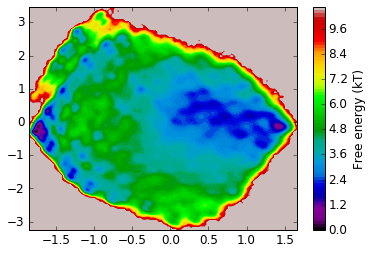

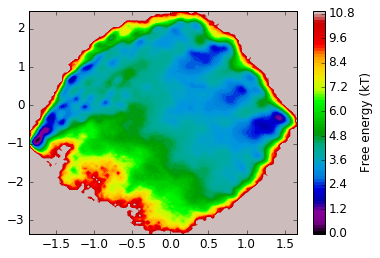

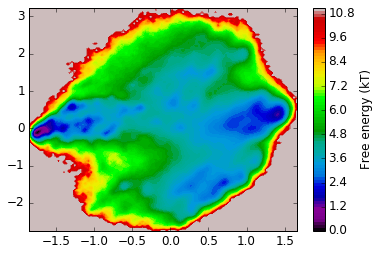

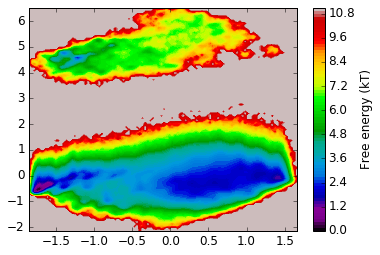

In [15]:
Ndim = 5
for dim in range(Ndim-1):
    fig, ax = mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,dim+1])
    plt.show()

In [16]:
# nb - this will introduce errors into the clustering but that only matter for the mpp part, let's ignore for now
from copy import deepcopy
Ndim = 5
dtraj_conc = deepcopy(Y[0][::Nprune,0:Ndim])
for traj in range(1,Ntraj):
    dtraj_conc = np.vstack((dtraj_conc,Y[traj][::Nprune,0:Ndim]))

In [17]:
np.savetxt('traj_len.dat',[Y[0].shape[0]])

In [18]:
# save the first N tica dimensions
np.savetxt('dtraj_tica'+str(Ndim)+'D.dat',dtraj_conc)